# mm.skelm - Em Construção!

Adaptado de mmskelm, ver refs em [00.index](https://colab.research.google.com/drive/1j9CAetyyaQpksFx_KhfvjYHA8XlwygZC#scrollTo=B2y3KytHaZVL)

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [3]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=cc234e8b-dba1-4193-900d-54a0790513db
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 39.0MB/s]


In [4]:
from _morph import *
help(mm.skelm)

Help on function skelm in module _morph:

skelm(f, b=array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8))
    versão corrigida em 2/3/2023
    essa implementação NÃO roda na lista3 até 2023.1



Considerar essa implementação até convergir: 

$$S_n(f,b)=(f\ominus nb)-(f\ominus nb)\circ b$$

$$ mm.skelm(f,b) = \bigcup_{n=1}^\infty S_n(f,b)$$

## Implementação da mmorph
```
function y=mmskelm_equ(f, B)
  y = mmbinary(zeros(size(f)));
  for i=0:length(f)
    nb = mmsesum(B,i);
    f1 = mmero(f,nb);
    f2 = mmopenth(f1,B);
    y = mmunion(y,f2);
  end; 
```

In [5]:
def skelm(f,b=np.zeros((3,3),dtype='uint8')): 
    """versão corrigida em 2/3/2023
    essa implementação NÃO roda na lista3 até 2023.1
    """
    global sesum, ero1, dil1
    img = f.copy()
    skel = np.zeros((f.shape))
    ero = np.ones((f.shape))
    n = 0
    while np.max(ero):
      nb = mm.sesum(b,n)
      ero = mm.ero1(img, nb)
      Sn = mm.subm(ero, mm.dil1(mm.ero1(ero, b), b)) #mm.subm dá underflow se uint8
      skel = np.maximum(skel,Sn)
      #print(f'n={n} nb=\n{mm.drawImage(nb)}\nero=\n{mm.drawImage(ero)}\nSn=\n{mm.drawImage(Sn)}\n')
      n += 1
    return skel

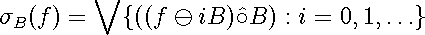

(200, 256)


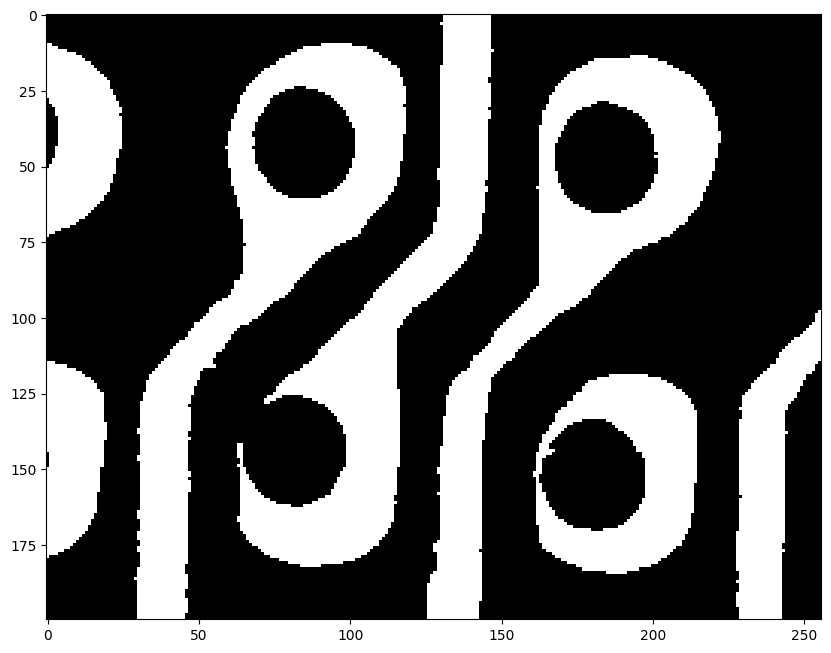

In [6]:
# https://drive.google.com/open?id=1eY4hdLj26MhKJGOzDwbesW8rRMnpO8Yp
img = mm.read('https://drive.google.com/file/d/1eY4hdLj26MhKJGOzDwbesW8rRMnpO8Yp/view?usp=sharing')
img = np.array(img,dtype='uint8')*255
print(img.shape)
plt.rcParams["figure.figsize"] = (10,8)
mm.show(img) 

In [ ]:
h,w = img.shape
img2 = (cv2.resize(img,(w//1,h//1)))>0
img2 = np.array(img2*1,dtype='uint8')
print(img2.shape)
print(np.amin(img2), np.amax(img2))
img3 = skelm(img2) # muiiiito lento!!!

In [ ]:
mm.show(cv2.cvtColor(img2*255,cv2.COLOR_GRAY2RGB),img3)

In [8]:
# fonte: https://theailearner.com/tag/skeletonization-opencv/

import numpy as np
 
# Create an image with text on it
#img = np.zeros((100,400),dtype='uint8')
#font = cv2.FONT_HERSHEY_SIMPLEX
#cv2.putText(img,'TheAILearner',(5,70), font, 2,(255),5,cv2.LINE_AA)
img1 = img.copy()
 
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
thin = np.zeros(img.shape,dtype='uint8')
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    erode = cv2.erode(img1,kernel)
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    subset = erode - opening
    thin = cv2.bitwise_or(subset,thin)
    img1 = erode.copy()

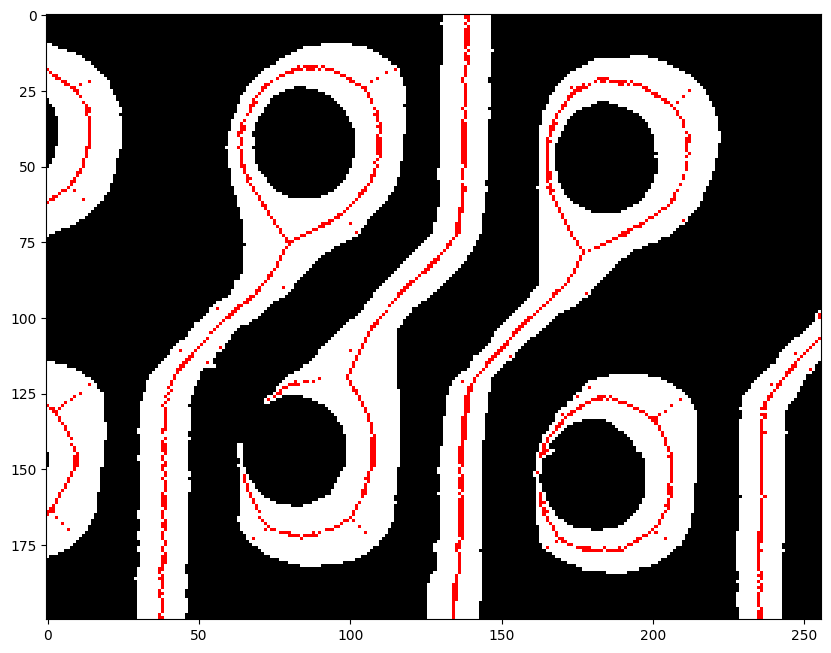

In [9]:
mm.show(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB),thin)

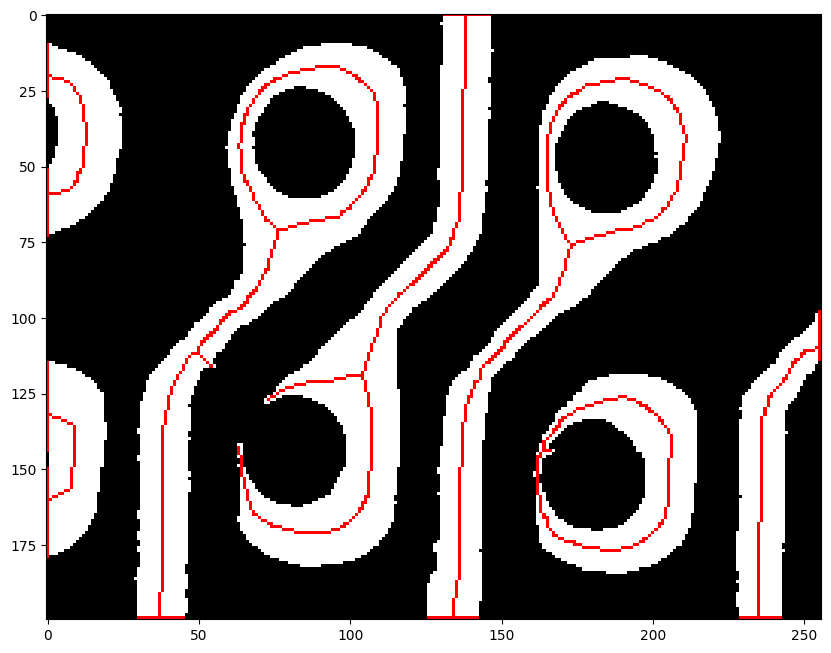

In [10]:
img = mm.read('https://drive.google.com/file/d/1eY4hdLj26MhKJGOzDwbesW8rRMnpO8Yp/view?usp=sharing')
img = np.array(img,dtype='uint8')*255
thinned = cv2.ximgproc.thinning(img)
mm.show(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB),thinned)

In [13]:
np.amax(img)

255

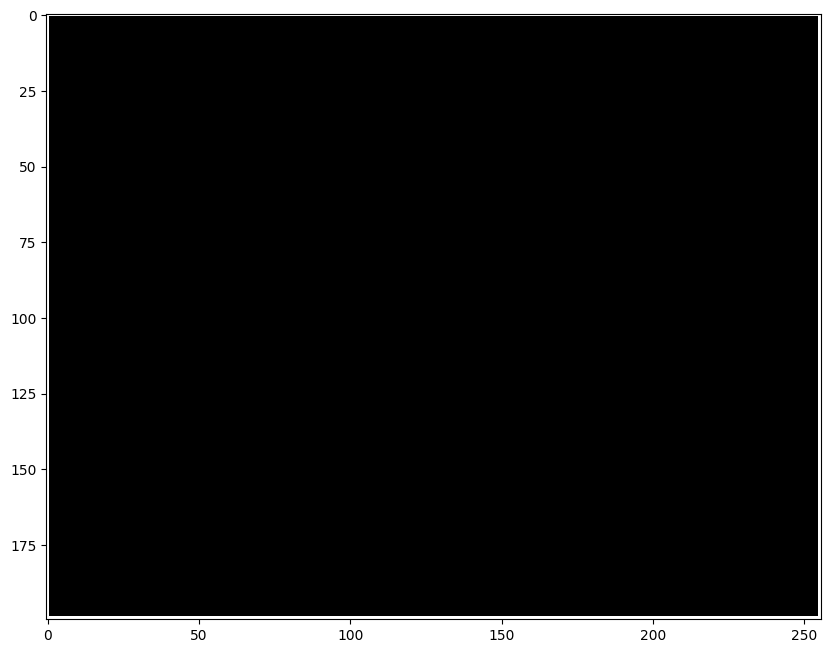

In [18]:
c = np.ones_like(img)*255
b = 1
c[b:-b, b:-b] = 0
mm.show(c)

0

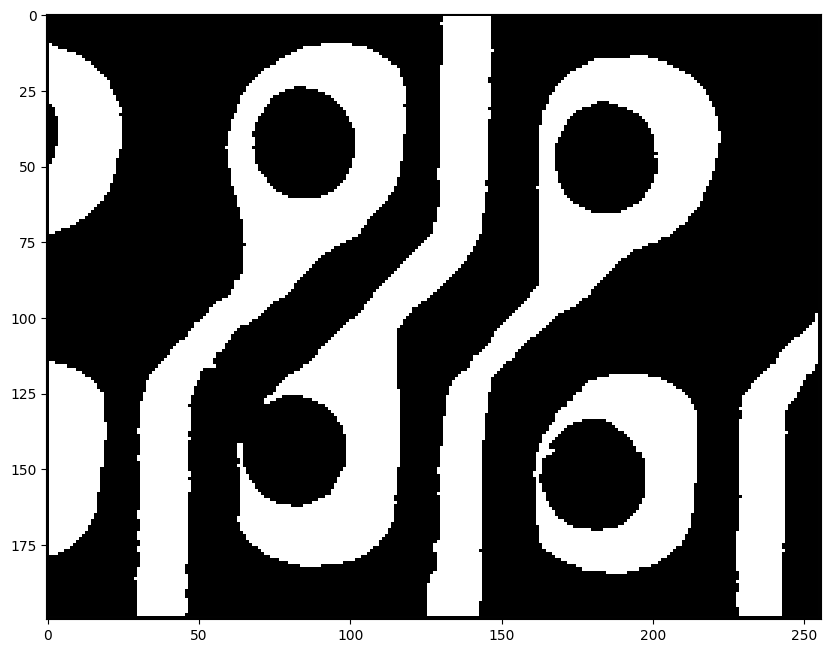

In [19]:
d = img-c
mm.show(img-c)
np.amin(d)

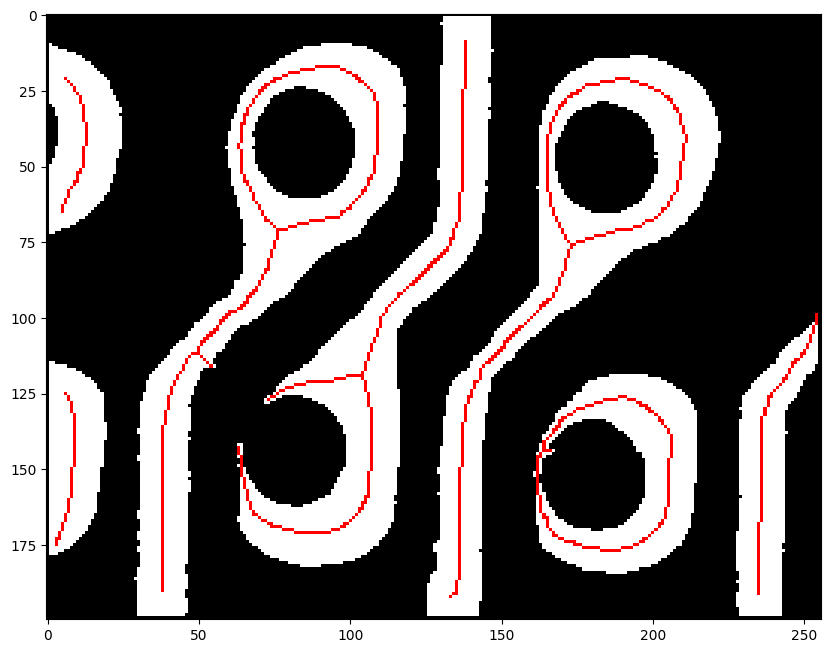

In [21]:
thinned = cv2.ximgproc.thinning(d)
mm.show(cv2.cvtColor(d,cv2.COLOR_GRAY2RGB),thinned)